Best solution: [5 5 2 2 3 2 5 5 2 4]


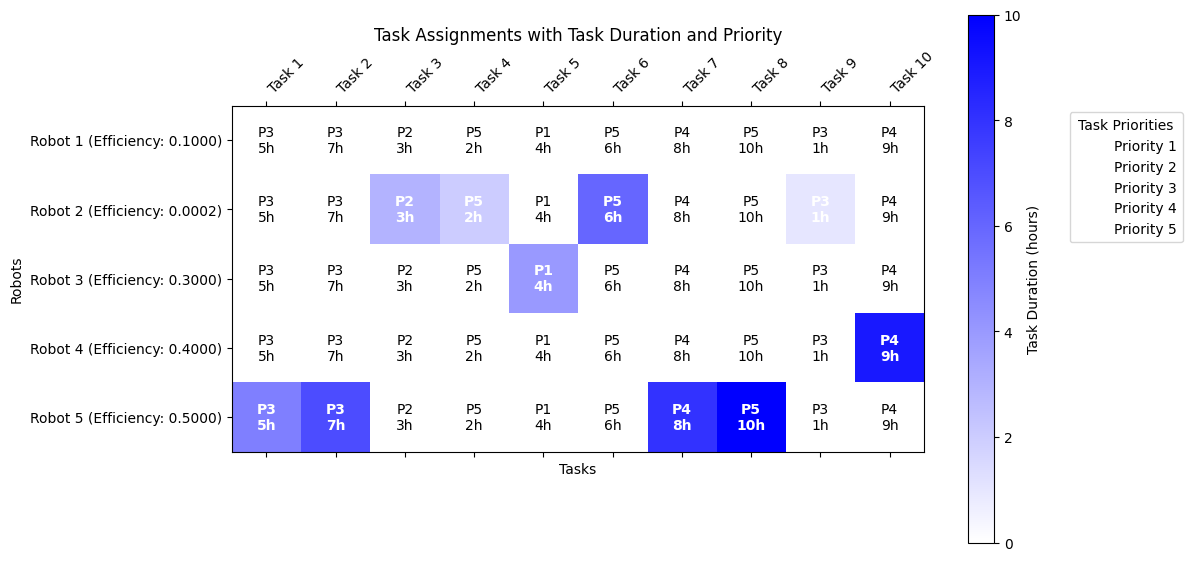

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

def init_population(population_size, num_jobs, num_robots):
    return np.random.randint(num_robots, size=(population_size, num_jobs))

def total_time_per_robot(jobs, priorities, efficiencies):
    time_per_robot = []
    for robot in range(len(efficiencies)):
        total_time = 0
        for job, priority in zip(jobs, priorities):
            total_time += (job * priority) / efficiencies[robot]

        time_per_robot.append(total_time)
    return max(time_per_robot)

def balance_workload(times):
    return np.std(times)

def fitness(jobs, priorities, efficiencies, solution):
    total_time = total_time_per_robot(jobs, priorities, efficiencies)
    balance = balance_workload([total_time])
    return total_time + balance

def select_parents(population, fitness_values, tournament_size):
    selected_parents = []
    num_individuals = len(population)
    for _ in range(num_individuals):
        tournament_indices = np.random.choice(num_individuals, size=tournament_size, replace=False)
        tournament_fitness = fitness_values[tournament_indices]
        winner_idx = np.argmax(tournament_fitness)
        selected_parents.append(population[tournament_indices[winner_idx]])
    return np.array(selected_parents)

def crossover(parents, population_size):
    offspring_list = []
    for _ in range(population_size):
        parent1_idx = np.random.randint(len(parents))
        parent2_idx = np.random.randint(len(parents))
        crossover_point = np.random.randint(1, len(parents[0]))
        offspring = np.concatenate((parents[parent1_idx][:crossover_point], parents[parent2_idx][crossover_point:]))
        offspring_list.append(offspring)
    return np.array(offspring_list)

def mutate(offspring_population, mutation_rate, num_robots):
    for offspring in offspring_population:
        for idx in range(len(offspring)):
            if np.random.rand() < mutation_rate:
                offspring[idx] = np.random.randint(num_robots)
    return offspring_population

def run_genetic_algo(durations, priorities, efficiencies, population_size, num_generations, mutation_rate, tournament_size):
    num_jobs = len(durations)
    num_robots = len(efficiencies)
    population = init_population(population_size, num_jobs, num_robots)
    best_solution = None
    best_fitness = float('inf')
    for generation in range(num_generations):
        fitness_values = np.array([fitness(durations, priorities, efficiencies, sol) for sol in population])
        if min(fitness_values) < best_fitness:
            best_solution = population[np.argmin(fitness_values)]
            best_fitness = min(fitness_values)
        selected_parents = select_parents(population, fitness_values, tournament_size)
        offspring = crossover(selected_parents, population_size)
        offspring = mutate(offspring, mutation_rate, num_robots)
        population = offspring
    return best_solution

def visualize_assignments(sol, durations, priorities, efficiencies, best_solution=None):
    grid = np.zeros((len(efficiencies), len(durations)), dtype=float)

    priority_values = [priorities[j] for j in range(len(durations))]

    for j, i in enumerate(sol):
        grid[i, j] = durations[j]

    fig, ax = plt.subplots(figsize=(12, 6))
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "blue"])

    cax = ax.matshow(grid, cmap=cmap)
    fig.colorbar(cax, label='Task Duration (hours)')

    for i in range(len(efficiencies)):
        for j in range(len(durations)):
            cell_content = grid[i, j]
            if cell_content != 0:
                duration = int(cell_content)
                annotation = f'P{priority_values[j]}\n{duration}h'
                if best_solution is not None and (i, j) == (best_solution[j], j):
                    ax.text(j, i, annotation, ha='center', va='center', color='white', fontweight='bold')
                else:
                    ax.text(j, i, annotation, ha='center', va='center', color='black')
            else:
                empty_duration = durations[j]
                empty_annotation = f'P{priority_values[j]}\n{empty_duration}h'
                ax.text(j, i, empty_annotation, ha='center', va='center', color='black')

    ax.set_xticks(np.arange(len(durations)))
    ax.set_yticks(np.arange(len(efficiencies)))
    ax.set_xticklabels([f'Task {i+1}' for i in range(len(durations))], rotation=45, ha="left")
    ax.set_yticklabels([f'Robot {i+1} (Efficiency: {eff:.4f})' for i, eff in enumerate(efficiencies)])

    plt.xlabel('Tasks')
    plt.ylabel('Robots')
    plt.title('Task Assignments with Task Duration and Priority')

    priority_patches = [mpatches.Patch(color='white', label=f'Priority {i}') for i in range(1, 6)]
    plt.legend(handles=priority_patches, bbox_to_anchor=(1.20, 1), loc='upper left', title="Task Priorities")

    plt.tight_layout()
    plt.show()


num_jobs = 10
num_robots = 5

durations = [5, 7, 3, 2, 4, 6, 8, 10, 1, 9]
priorities = np.random.randint(1, 6, size=num_jobs)
efficiencies = [0.1,0.0002,0.3,0.4,0.5]
population_size = 100
num_generations = 1000
mutation_rate = 0.05
tournament_size = 5

best_sol = run_genetic_algo(durations, priorities, efficiencies, population_size, num_generations, mutation_rate, tournament_size)
print("Best solution:", best_sol+1)

visualize_assignments(best_sol, durations, priorities, efficiencies, best_sol)
